In [1]:
from dariah_topics import preprocessing as pre
from dariah_topics import visualization as visual
from dariah_topics import evaluation

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 12:33:34.241283. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## Preprocessing

#### Liste mit Dateinamen erzeugen

In [2]:
path_txt = "corpus_txt"
#path_txt = "grenzbote_plain/*/"
#path_txt = "wiki/"

doclist_txt = pre.create_document_list(path_txt)
assert doclist_txt, "No documents found"
doclist_txt[:5]

['corpus_txt/Lovecraft_AttheMountainofMadness.txt',
 'corpus_txt/Howard_TheDevilinIron.txt',
 'corpus_txt/Poe_ThePurloinedLetter.txt',
 'corpus_txt/Lovecraft_TheShunnedHouse.txt',
 'corpus_txt/Poe_TheMasqueoftheRedDeath.txt']

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 12:33:35.621622. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


#####  Liste mit Dokumentenlabels erzeugen - (Funktion wird durch Thorsten's generischere Funktion ersetzt)

In [3]:
doc_labels = list(pre.get_labels(doclist_txt))
doc_labels[:5]

['Lovecraft_AttheMountainofMadness',
 'Howard_TheDevilinIron',
 'Poe_ThePurloinedLetter',
 'Lovecraft_TheShunnedHouse',
 'Poe_TheMasqueoftheRedDeath']

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 12:33:35.631036. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


#### Corpus laden

In [4]:
corpus_txt = pre.read_from_txt(doclist_txt)

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 12:33:35.646129. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


#### Tokenisieren

In [5]:
doc_tokens = [list(pre.tokenize(txt)) for txt in list(corpus_txt)]

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 12:33:35.656636. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


#### Create Dictionaries

In [6]:
id_types, doc_ids = pre.create_dictionaries(doc_labels, doc_tokens)

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 12:33:35.958266. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


#### Sparse BOW Model

In [7]:
sparse_bow = pre.create_mm(doc_labels, doc_tokens, id_types, doc_ids)

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 12:33:36.027892. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [8]:
sparse_bow[:5]

0
doc_id token_id   
1      1         3
       4         1
       16389     1
       9         1
       16396     1

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 12:33:36.414443. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## Topic Modeling with Gensim

##### Saving Sparse BOW

In [9]:
pre.save_bow_mm(sparse_bow, "gensim_txt")

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 12:33:36.426606. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


#### Import Market Matrix

In [10]:
from gensim.models import LdaModel
from gensim.corpora import MmCorpus

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 12:33:36.554136. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [11]:
mm = MmCorpus("gensim_txt.mm")

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 12:33:36.558600. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [12]:
doc2id = {value : key for key, value in doc_ids.items()}
type2id = {value : key for key, value in id_types.items()}

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 12:33:36.569851. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


##### Remove Features

type2id = {value : key for key, value in id_types.items()}
sparse_bow_collapsed = sparse_bow.groupby(sparse_bow.index.get_level_values('token_id')).sum()

sparse_bow_hapax = sparse_bow_collapsed.loc[sparse_bow_collapsed[0] == 1]
hapax = [type2id[key] for key in sparse_bow_hapax.index.get_level_values('token_id')]

len(hapax)

In [13]:
import os.path
basepath = os.path.abspath('.')

with open(os.path.join(basepath, "tutorial_supplementals", "stopwords", "de.txt"), 'r', encoding = 'utf-8') as f: 
    stopword_list = f.read().split('\n')
    
stopword_list = set(stopword_list)

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 12:33:36.580209. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [14]:
hapax_from_remove = pre.find_hapax(sparse_bow, id_types)
stopwords_from_remove = pre.find_stopwords(sparse_bow, id_types, mfw=75)

#features_to_be_removed = set(hapax_from_remove + stopwords_from_remove)
features_to_be_removed = stopwords_from_remove

sparse_bow_short = pre.remove_features(sparse_bow, id_types, features_to_be_removed)

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 12:33:36.590420. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [15]:
len(features_to_be_removed)

75

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 12:33:36.739894. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [16]:
pre.save_bow_mm(sparse_bow_short, "gensim_txt")

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 12:33:36.748477. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [17]:
mm = MmCorpus("gensim_txt.mm")

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 12:33:36.842716. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


#### Convert sparse_bow to list of (doc, tokens) tuples (like doc2bow)

In [18]:
doc2bow_list = []

for doc in sparse_bow_short.index.groupby(sparse_bow_short.index.get_level_values('doc_id')):
    temp = [(token, count) for token, count in zip(sparse_bow_short.loc[doc].index, sparse_bow_short.loc[doc][0])]
    doc2bow_list.append(temp)

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 12:33:36.851945. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [19]:
len(doc2bow_list)

17

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 12:33:36.933884. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [20]:
#model = LdaModel(corpus=mm, id2word=type2id, num_topics=60, alpha = "symmetric", passes = 10) #import momentan in visual 
# -> da ich mir noch nicht sicher bin, welche Funktionen in das tm_gensim.py sollen
model = LdaModel(corpus=mm, id2word=type2id, num_topics=20, passes = 10, iterations = 20)

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 12:33:36.942253. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [21]:
model.get_document_topics(doc2bow_list[1])

[(2, 0.023249171299572019),
 (3, 0.096308438054866927),
 (5, 0.019741356839378027),
 (6, 0.015510920670718482),
 (7, 0.06000241307307648),
 (9, 0.037316104395400895),
 (10, 0.090216881387716871),
 (11, 0.30787999396887145),
 (13, 0.014811784963532056),
 (14, 0.14848099258547087),
 (16, 0.019342627691126789),
 (17, 0.1495883486134271),
 (19, 0.010054894689448816)]

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 12:34:18.395184. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [22]:
#Anzeige der keywords für topic n
n = 1
topic_nr_x = model.get_topic_terms(n)

topicTerms = [type2id[i[0]] for i in topic_nr_x]
topicTerms

['arrogant',
 'monstrous',
 'ride',
 'rash',
 'costs',
 'divan',
 'indignant',
 'busying',
 'cares',
 'pseudo-neck']

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 12:34:18.404462. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [127]:
#Topic probabilities
topics = model.show_topics(num_topics = model.num_topics, formatted=False)

num_topics = model.num_topics
topics_df = pre.pd.DataFrame(index = range(num_topics), columns= range(10))

for topic in topics:
    idx = topic[0]
    temp = topic[1]
    topics_df.loc[idx] = temp
        
topics_df

,0,1,2,3,4,5,6,7,8,9
0,"(misunderstanding, 0.000836857295414)","(despised, 0.000380151914649)","(rash, 0.000371716792211)","(monstrous, 0.000323945814796)","(plows, 0.000309736667133)","(pseudo-neck, 0.000288165206479)","(proposing, 0.000287332998659)","(reprint, 0.000283154060835)","(rode, 0.000281321720589)","(ramp's, 0.000278829269337)"
1,"(arrogant, 0.000628108717352)","(monstrous, 0.000620133033802)","(ride, 0.000561271667865)","(rash, 0.000522334662302)","(costs, 0.000509276224587)","(divan, 0.000497601981759)","(indignant, 0.000491034435519)","(busying, 0.000480484452156)","(cares, 0.000455146674747)","(pseudo-neck, 0.000454730021777)"
2,"(tubular, 0.00432851612024)","(system’s, 0.00402864898196)","(rode, 0.00299619007811)","(physico-metaphysical, 0.00249697206121)","(arrogant, 0.00205065895995)","(italian, 0.00204921619122)","(disappear, 0.00203039464957)","(revelled, 0.00188675474041)","(viii, 0.00185502694111)","(sensitized, 0.00175541990704)"
3,"(tubular, 0.0117763680959)","(system’s, 0.00825525748098)","(physico-metaphysical, 0.00773296369325)","(rode, 0.00699916831432)","(revelled, 0.00637006305978)","(disappear, 0.00619269056295)","(viii, 0.00618196802299)","(arrogant, 0.00613990847949)","(sensitized, 0.00573835798871)","(italian, 0.0052371958456)"
4,"(proposing, 0.000272373169922)","(slide, 0.000253588237462)","(unimaginable, 0.000245123189362)","(arrogant, 0.000241585828651)","(plows, 0.000230887177958)","(bob, 0.000225963441424)","(despised, 0.000224293955812)","(furrows, 0.000220484575414)","(cobs, 0.000214450435563)","(rode, 0.000211049018347)"
5,"(dignified, 0.0112995870408)","(lusted, 0.00774316586188)","(conventionalities, 0.00595562132647)","(reenter, 0.0059535070953)","(flamingo, 0.00579466453157)","(sculled, 0.00459856684736)","(furrows, 0.00423010916449)","(urgent, 0.00398304023476)","(teddy's, 0.00377829020657)","(temporarily, 0.00377406260008)"
6,"(termination, 0.00317180046802)","(sealed, 0.00243017492494)","(pattern, 0.00242279031679)","(barbarism, 0.00241971110791)","(frosty, 0.00182106201857)","(lump, 0.00181412462853)","(holland, 0.00180333059341)","(assaults, 0.0018024523156)","(hips, 0.00180057601558)","(runaways, 0.00178712232247)"
7,"(dim-lit, 0.0136646333736)","(unimaginable, 0.00605644030455)","(proposing, 0.00460040399113)","(termination, 0.00456519128252)","(divan, 0.00432987582537)","(cthulhu, 0.00414873876716)","(revolutionizing, 0.00412410397227)","(andirons, 0.0038352325978)","(tips, 0.00378252842927)","(colourless, 0.00364077716261)"
8,"(notions, 0.0072122353146)","(growths, 0.00635634121955)","(income, 0.00594282446104)","(proposing, 0.00353754888959)","(rolls, 0.00346411236431)","(licked, 0.00340095150891)","(didst, 0.00309389882803)","(desk, 0.00306612697242)","(pyramid, 0.00304260714124)","(bantam's, 0.0029791529171)"
9,"(busying, 0.00856519792035)","(outrageous, 0.00583457330144)","(despised, 0.00444480654173)","(preceding, 0.00442294510805)","(houndsditch, 0.00386442895927)","(dangers, 0.00370611256099)","(bob, 0.00358951632773)","(proposing, 0.00301429627047)","(bunsen, 0.00301309888647)","(unimaginable, 0.00289151885813)"


/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:14:26.775638. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [129]:
import pandas as pd
import regex as re
def gensim2dataframe(model):
    num_topics = model.num_topics
    topics_df = pd.DataFrame(index = range(num_topics), columns= range(10))
    topics = model.show_topics(num_topics = num_topics, log=False, formatted=False)
    
    for topic in topics:
        idx = topic[0]
        temp = topic[1]
        topics_df.loc[idx] = temp

    return topics_df

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:15:09.866447. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [130]:
topics_df = gensim2dataframe(model)
topics_df

,0,1,2,3,4,5,6,7,8,9
0,"(misunderstanding, 0.000836857295414)","(despised, 0.000380151914649)","(rash, 0.000371716792211)","(monstrous, 0.000323945814796)","(plows, 0.000309736667133)","(pseudo-neck, 0.000288165206479)","(proposing, 0.000287332998659)","(reprint, 0.000283154060835)","(rode, 0.000281321720589)","(ramp's, 0.000278829269337)"
1,"(arrogant, 0.000628108717352)","(monstrous, 0.000620133033802)","(ride, 0.000561271667865)","(rash, 0.000522334662302)","(costs, 0.000509276224587)","(divan, 0.000497601981759)","(indignant, 0.000491034435519)","(busying, 0.000480484452156)","(cares, 0.000455146674747)","(pseudo-neck, 0.000454730021777)"
2,"(tubular, 0.00432851612024)","(system’s, 0.00402864898196)","(rode, 0.00299619007811)","(physico-metaphysical, 0.00249697206121)","(arrogant, 0.00205065895995)","(italian, 0.00204921619122)","(disappear, 0.00203039464957)","(revelled, 0.00188675474041)","(viii, 0.00185502694111)","(sensitized, 0.00175541990704)"
3,"(tubular, 0.0117763680959)","(system’s, 0.00825525748098)","(physico-metaphysical, 0.00773296369325)","(rode, 0.00699916831432)","(revelled, 0.00637006305978)","(disappear, 0.00619269056295)","(viii, 0.00618196802299)","(arrogant, 0.00613990847949)","(sensitized, 0.00573835798871)","(italian, 0.0052371958456)"
4,"(proposing, 0.000272373169922)","(slide, 0.000253588237462)","(unimaginable, 0.000245123189362)","(arrogant, 0.000241585828651)","(plows, 0.000230887177958)","(bob, 0.000225963441424)","(despised, 0.000224293955812)","(furrows, 0.000220484575414)","(cobs, 0.000214450435563)","(rode, 0.000211049018347)"
5,"(dignified, 0.0112995870408)","(lusted, 0.00774316586188)","(conventionalities, 0.00595562132647)","(reenter, 0.0059535070953)","(flamingo, 0.00579466453157)","(sculled, 0.00459856684736)","(furrows, 0.00423010916449)","(urgent, 0.00398304023476)","(teddy's, 0.00377829020657)","(temporarily, 0.00377406260008)"
6,"(termination, 0.00317180046802)","(sealed, 0.00243017492494)","(pattern, 0.00242279031679)","(barbarism, 0.00241971110791)","(frosty, 0.00182106201857)","(lump, 0.00181412462853)","(holland, 0.00180333059341)","(assaults, 0.0018024523156)","(hips, 0.00180057601558)","(runaways, 0.00178712232247)"
7,"(dim-lit, 0.0136646333736)","(unimaginable, 0.00605644030455)","(proposing, 0.00460040399113)","(termination, 0.00456519128252)","(divan, 0.00432987582537)","(cthulhu, 0.00414873876716)","(revolutionizing, 0.00412410397227)","(andirons, 0.0038352325978)","(tips, 0.00378252842927)","(colourless, 0.00364077716261)"
8,"(notions, 0.0072122353146)","(growths, 0.00635634121955)","(income, 0.00594282446104)","(proposing, 0.00353754888959)","(rolls, 0.00346411236431)","(licked, 0.00340095150891)","(didst, 0.00309389882803)","(desk, 0.00306612697242)","(pyramid, 0.00304260714124)","(bantam's, 0.0029791529171)"
9,"(busying, 0.00856519792035)","(outrageous, 0.00583457330144)","(despised, 0.00444480654173)","(preceding, 0.00442294510805)","(houndsditch, 0.00386442895927)","(dangers, 0.00370611256099)","(bob, 0.00358951632773)","(proposing, 0.00301429627047)","(bunsen, 0.00301309888647)","(unimaginable, 0.00289151885813)"


/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:15:11.767803. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [131]:
doc_topic = topics_df.T
doc_topic

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,"(misunderstanding, 0.000836857295414)","(arrogant, 0.000628108717352)","(tubular, 0.00432851612024)","(tubular, 0.0117763680959)","(proposing, 0.000272373169922)","(dignified, 0.0112995870408)","(termination, 0.00317180046802)","(dim-lit, 0.0136646333736)","(notions, 0.0072122353146)","(busying, 0.00856519792035)","(monstrous, 0.0117319903283)","(slide, 0.00438859502192)","(didst, 0.000347544688848)","(square, 0.0070964018651)","(rikk-tikk, 0.00519490773207)","(slide, 0.000562281478282)","(wherry, 0.00966195787093)","(igneous, 0.00409963162997)","(monstrous, 0.00196020025545)","(questioned, 0.00504410347223)"
1,"(despised, 0.000380151914649)","(monstrous, 0.000620133033802)","(system’s, 0.00402864898196)","(system’s, 0.00825525748098)","(slide, 0.000253588237462)","(lusted, 0.00774316586188)","(sealed, 0.00243017492494)","(unimaginable, 0.00605644030455)","(growths, 0.00635634121955)","(outrageous, 0.00583457330144)","(rash, 0.00763394869037)","(proposing, 0.00435155007625)","(reprint, 0.000325194716756)","(topsides, 0.00637492071063)","(pseudo-neck, 0.00471167409278)","(revolutionizing, 0.000371135610375)","(traces, 0.00953243451941)","(proposing, 0.00403348791377)","(jowels, 0.00134462068077)","(unimaginable, 0.00386690379106)"
2,"(rash, 0.000371716792211)","(ride, 0.000561271667865)","(rode, 0.00299619007811)","(physico-metaphysical, 0.00773296369325)","(unimaginable, 0.000245123189362)","(conventionalities, 0.00595562132647)","(pattern, 0.00242279031679)","(proposing, 0.00460040399113)","(income, 0.00594282446104)","(despised, 0.00444480654173)","(ramp's, 0.00497906403168)","(didst, 0.00356063432863)","(coffee-cup, 0.000311821590979)","(unimaginable, 0.00459155853649)","(oblige, 0.00467155409778)","(arrogant, 0.000360926048498)","(good-humored, 0.00837420900845)","(slide, 0.00382300728116)","(rash, 0.000830831225734)","(chop-one, 0.00378165793437)"
3,"(monstrous, 0.000323945814796)","(rash, 0.000522334662302)","(physico-metaphysical, 0.00249697206121)","(rode, 0.00699916831432)","(arrogant, 0.000241585828651)","(reenter, 0.0059535070953)","(barbarism, 0.00241971110791)","(termination, 0.00456519128252)","(proposing, 0.00353754888959)","(preceding, 0.00442294510805)","(broken, 0.00477632581481)","(ride, 0.0034989972974)","(unimaginable, 0.000306399947856)","(juice, 0.00418134136889)","(flamingo, 0.00396014999244)","(despised, 0.000354564930568)","(specialist, 0.00566364789371)","(revolutionizing, 0.00380327076557)","(furrows, 0.000823939292737)","(proposing, 0.00344116378091)"
4,"(plows, 0.000309736667133)","(costs, 0.000509276224587)","(arrogant, 0.00205065895995)","(revelled, 0.00637006305978)","(plows, 0.000230887177958)","(flamingo, 0.00579466453157)","(frosty, 0.00182106201857)","(divan, 0.00432987582537)","(rolls, 0.00346411236431)","(houndsditch, 0.00386442895927)","(commander, 0.0044767490139)","(rash, 0.00347348409835)","(despised, 0.000293520166832)","(divan, 0.00412371575187)","(reunited, 0.00384021217731)","(indignant, 0.000349762728258)","(slammed, 0.00386528459312)","(nicekind-hen, 0.00366308465171)","(ride, 0.00078239518911)","(didst, 0.00342479815368)"
5,"(pseudo-neck, 0.000288165206479)","(divan, 0.000497601981759)","(italian, 0.00204921619122)","(disappear, 0.00619269056295)","(bob, 0.000225963441424)","(sculled, 0.00459856684736)","(lump, 0.00181412462853)","(cthulhu, 0.00414873876716)","(licked, 0.00340095150891)","(dangers, 0.00370611256099)","(furrows, 0.00439633513208)","(reprint, 0.00342731605242)","(proposing, 0.000291379198006)","(half-past, 0.00397516256537)","(crank, 0.00370687488925)","(unimaginable, 0.000347950735618)","(ambiguity, 0.00345047005849)","(coffee-cup, 0.00353880814836)","(reunited, 0.000781225188236)","(constructs, 0.00338070023908)"
6,"(proposing, 0.000287332998659)","(indignant, 0.000491034435519)","(disappear, 0.00203039464957)","(viii, 0.00618196802299)","(despised, 0.000224293955812)","(furrows, 0.00423010916449)","(holland

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:15:17.982455. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


## Visualisierung 

In [132]:
'''lda_model = 'out_easy/corpus.lda'
corpus = 'out_easy/corpus.mm'
dictionary = 'out_easy/corpus.dict'
doc_labels = 'out_easy/corpus_doclabels.txt'
interactive  = False

vis = visual.Visualization(lda_model, corpus, dictionary, doc_labels, interactive)'''

"lda_model = 'out_easy/corpus.lda'\ncorpus = 'out_easy/corpus.mm'\ndictionary = 'out_easy/corpus.dict'\ndoc_labels = 'out_easy/corpus_doclabels.txt'\ninteractive  = False\n\nvis = visual.Visualization(lda_model, corpus, dictionary, doc_labels, interactive)"

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:15:25.395551. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


##### Create a document-topic matrix (that is a pandas data frame actually)

In [133]:
doc_topic = visual.create_doc_topic(mm, model, doc_labels)

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:15:26.206171. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


##### Visualize document-topic matrix

<module 'matplotlib.pyplot' from '/home/sina/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>

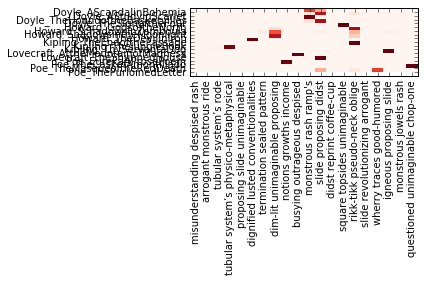

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:15:27.580634. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [134]:
%matplotlib inline
visual.doc_topic_heatmap(doc_topic)

##### Visualize topic distribution in a single document

<module 'matplotlib.pyplot' from '/home/sina/.local/lib/python3.5/site-packages/matplotlib/pyplot.py'>

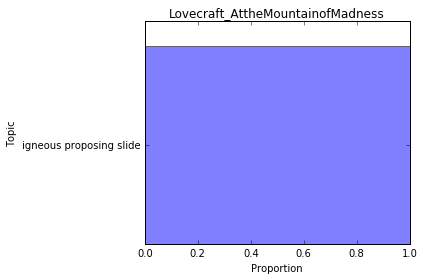

/usr/lib/python3.5/json/encoder.py:198: DeprecationWarning: Interpreting naive datetime as local 2017-04-03 13:15:32.134199. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)


In [135]:
visual.plot_doc_topics(doc_topic, 0)

![success](http://cdn2.hubspot.net/hub/128506/file-446943132-jpg/images/computer_woman_success.jpg)